___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
Alessandra Blücher

## TÍTULO DO SEU PROJETO

Acesso a internet no próprio domicilio comparado a outros utensílios diários.

___
## Introdução

A análise de dado tem por fim observar o grau de prioridade atribuido a internet nos domicílios brasileiros comparado a algumas variaveis relevantes.


___
## Análise e Resultados

In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [24]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\aless\Desktop\Leca\Insper\Matérias\2o Semestre\Ciência de Dados


In [25]:
#Se usar o arquivo descompactado
dados = pd.read_csv('DOM2013.csv',sep=',')


In [26]:
#Importação das variáveis escolhidas
dados_2013 = dados.loc[(dados.V4105>3),['V4105','V0211','V02322','V0230','V0228','V0215','V4624','V4621']]

In [27]:
dados_2013.head()

,V4105,V0211,V02322,V0230,V0228,V0215,V4624,V4621
122,8,1.0,4.0,4.0,4.0,1.0,2.0,678.0
123,8,1.0,4.0,4.0,4.0,1.0,2.0,357.0
124,8,1.0,4.0,2.0,4.0,1.0,2.0,500.0
125,8,1.0,4.0,2.0,4.0,1.0,2.0,335.0
126,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Separação entre categorias ou floats
dados_2013.V4105 = dados_2013.V4105.astype('category')
dados_2013.V0211 = dados_2013.V0211.astype('category')
dados_2013.V02322 = dados_2013.V02322.astype('category')
dados_2013.V0230 = dados_2013.V0230.astype('category')
dados_2013.V0228 = dados_2013.V0228.astype('category')
dados_2013.V0215 = dados_2013.V0215.astype('category')
dados_2013.V4624 = dados_2013.V4624.astype('category')
dados_2013.V4621 = dados_2013.V4621.astype('float')

In [29]:
dados_2013.dtypes

V4105     category
V0211     category
V02322    category
V0230     category
V0228     category
V0215     category
V4624     category
V4621      float64
dtype: object

In [30]:
#Filtração e nomenclatura das Áreas rurais
dados_2013.loc[(dados_2013.V4105==4), 'Situação Censitária'] = 'RURAL - Aglomerado rural de extensão urbana'
dados_2013.loc[(dados_2013.V4105==5), 'Situação Censitária'] = 'RURAL - Aglomerado rural, isolado, povoado'
dados_2013.loc[(dados_2013.V4105==6), 'Situação Censitária'] = 'RURAL - Aglomerado rural, isolado, núcleo'
dados_2013.loc[(dados_2013.V4105==7), 'Situação Censitária'] = 'RURAL - Aglomerado rural, isolado, outros aglomerados'
dados_2013.loc[(dados_2013.V4105==8), 'Situação Censitária'] = 'RURAL - Zona rural exclusive aglomerado rural '


dados_2013.V0211.cat.categories = (['Sim', 'Não'])
dados_2013.V02322.cat.categories = (['Sim', 'Não'])
dados_2013.V0230.cat.categories = (['Sim', 'Não'])
dados_2013.V0228.cat.categories = (['Sim, de duas portas','Sim, de uma porta','Não'])
dados_2013.V0215.cat.categories = (['Sim', 'Não'])
dados_2013.V4624.cat.categories = (['Rede geral com canalização interna', 'Poço ou nascente com canalização interna', 'Outra procedência com canalização interna', 'Rede geral sem canalização interna', 'Poço ou nascente sem canalização interna', 'Outra procedência sem canalização interna'])

#dados_2013.V4621  ---> por salário mínimoz


dados_2013 = dados_2013.rename(columns= {'V0211': 'AguaCanalizada', 'V02322':'AcessoaInternetnoDomicílio', 'V0230': 'Máquina de Lavar Roupa', 'V0228':'Geladeira', 'V0215': 'Banheiro ou Sanitário', 'V4624': 'Forma de Abastecimento de Água', 'V4621':'Rendimentomensaldomiciliarpercapita'})
dados_2013.drop (['V4105'], axis = 1, inplace = True)
dados_2013 = dados_2013.dropna()


dados_2013



,AguaCanalizada,AcessoaInternetnoDomicílio,Máquina de Lavar Roupa,Geladeira,Banheiro ou Sanitário,Forma de Abastecimento de Água,Rendimentomensaldomiciliarpercapita,Situação Censitária
122,Sim,Não,Não,"Sim, de uma porta",Sim,Poço ou nascente com canalização interna,678.0,RURAL - Zona rural exclusive aglomerado rural
123,Sim,Não,Não,"Sim, de uma porta",Sim,Poço ou nascente com canalização interna,357.0,RURAL - Zona rural exclusive aglomerado rural
124,Sim,Não,Sim,"Sim, de uma porta",Sim,Poço ou nascente com canalização interna,500.0,RURAL - Zona rural exclusive aglomerado rural
125,Sim,Não,Sim,"Sim, de uma porta",Sim,Poço ou nascente com canalização interna,335.0,RURAL - Zona rural exclusive aglomerado rural
128,Sim,Não,Sim,"Sim, de duas portas",Sim,Poço ou nascente com canalização interna,363.0,RURAL - Zona rural exclusive aglomerado rural
129,Sim,Não,Não,"Sim, de uma porta",Sim,Poço ou nascente com canalização interna,121.0,RURAL - Zona rural exclusive aglomerado rural
130,Sim,Não,Não,"Sim, de uma porta",Sim,Rede geral com canalização interna,125.0,RURAL - Zona rural exclusive aglomerado rural
132,Sim,Não,Não,"Sim, de uma porta",Sim,Poço ou nascente com canalização interna,740.0,RURAL - Zona rural exclusive aglomerado rural
134,Sim,Sim,Não,"Sim, de uma porta",Sim,Poço ou nascente com canalização interna,0.0,RURAL - Zona rural exclusive aglomerado rural
135,Sim,Não,Não,"Sim, de uma porta",Sim,Poço ou nascente com canalização interna,120.0,RURAL - Zona rural exclusive aglomerado rural


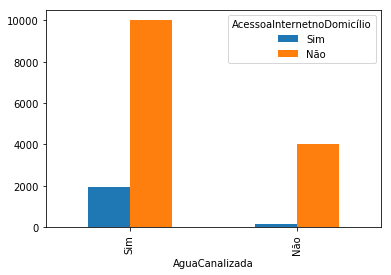

In [31]:
cll = pd.crosstab(dados_2013.AguaCanalizada, dados_2013.AcessoaInternetnoDomicílio)
plot = cll.plot(kind="bar")

In [32]:
#rendavsinternet = dados_2013
#rendavsinternet['RendimentoFamiliar']= dados_2013.Rendimentomensaldomiciliarpercapita
#rendavsinternet['Acessoainternetno']= dados_2013.AcessoaInternetnoDomicílio


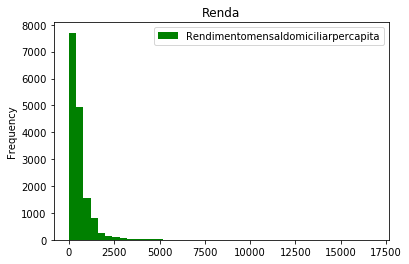

In [38]:
faixa = np.arange(0,17000, 400)
dados_2013.plot.hist(title="Renda", bins = faixa, color = 'green')

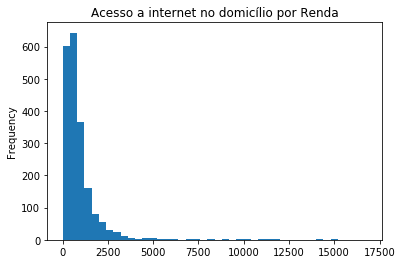

In [34]:
faixa = np.arange(0,17000, 400)
dados_2013['Rendimentomensaldomiciliarpercapita'][dados_2013['AcessoaInternetnoDomicílio']== 'Sim'].plot.hist(title="Acesso a internet no domicílio por Renda", bins = faixa)


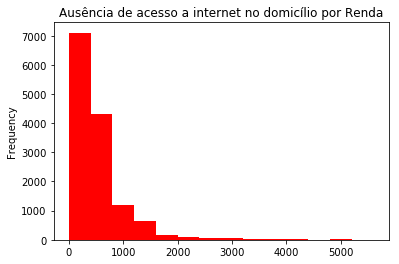

In [39]:
faixa = np.arange(0,6000, 400)
dados_2013['Rendimentomensaldomiciliarpercapita'][dados_2013['AcessoaInternetnoDomicílio']== 'Não'].plot.hist(title="Ausência de acesso a internet no domicílio por Renda", bins = faixa, color= 'red')

In [ ]:
#Conclusões